# <font color = blue> K-means clustering for Anchor Boxes using Sample COCO dataset </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.cluster import KMeans
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import shutil
import json
import random

In [2]:
sample_coco_df = pd.read_csv("sample_coco.txt", header=None)

In [3]:
sample_coco_df.head()

,0,1,2,3,4,5,6,7
0,id: 0,height: 330,width: 1093,bbox:[69,464,312,175],NaN
1,id: 1,height: 782,width: 439,bbox:[359,292,83,199],NaN
2,id: 3,height: 645,width: 831,bbox:[297,312,267,167],NaN
3,id: 34,height: 943,width: 608,bbox:[275,112,319,290],NaN
4,id: 20,height: 593,width: 857,bbox:[71,368,146,147],NaN


In [4]:
sample_coco_df.drop(labels=7,axis=1,inplace=True)

In [5]:
sample_coco_df.columns = ['class_id','img_height','img_width','bbox_x','bbox_y','bbox_width','bbox_height']

In [6]:
sample_coco_df.head()

,class_id,img_height,img_width,bbox_x,bbox_y,bbox_width,bbox_height
0,id: 0,height: 330,width: 1093,bbox:[69,464,312,175]
1,id: 1,height: 782,width: 439,bbox:[359,292,83,199]
2,id: 3,height: 645,width: 831,bbox:[297,312,267,167]
3,id: 34,height: 943,width: 608,bbox:[275,112,319,290]
4,id: 20,height: 593,width: 857,bbox:[71,368,146,147]


In [7]:
sample_coco_df['class_id']=sample_coco_df['class_id'].apply(lambda x:x.split(':')[1])
sample_coco_df['img_height']=sample_coco_df['img_height'].apply(lambda x:x.split(':')[1])
sample_coco_df['img_width']=sample_coco_df['img_width'].apply(lambda x:x.split(':')[1])
sample_coco_df['bbox_x']=sample_coco_df['bbox_x'].apply(lambda x:x.split(':')[1][1:])
sample_coco_df['bbox_height']=sample_coco_df['bbox_height'].apply(lambda x:x[:-1])

In [8]:
sample_coco_df.head()

,class_id,img_height,img_width,bbox_x,bbox_y,bbox_width,bbox_height
0,0,330,1093,69,464,312,175
1,1,782,439,359,292,83,199
2,3,645,831,297,312,267,167
3,34,943,608,275,112,319,290
4,20,593,857,71,368,146,147


In [9]:
sample_coco_df.shape

(10105, 7)

In [10]:
sample_coco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10105 entries, 0 to 10104
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_id     10105 non-null  object
 1   img_height   10105 non-null  object
 2   img_width    10105 non-null  object
 3   bbox_x       10105 non-null  object
 4   bbox_y       10105 non-null  int64 
 5   bbox_width   10105 non-null  int64 
 6   bbox_height  10105 non-null  object
dtypes: int64(2), object(5)
memory usage: 552.7+ KB


In [11]:
sample_coco_df=sample_coco_df.apply(pd.to_numeric)

In [12]:
sample_coco_df.head()

,class_id,img_height,img_width,bbox_x,bbox_y,bbox_width,bbox_height
0,0,330,1093,69,464,312,175
1,1,782,439,359,292,83,199
2,3,645,831,297,312,267,167
3,34,943,608,275,112,319,290
4,20,593,857,71,368,146,147


In [13]:
sample_coco_df['norm_b_x'] = sample_coco_df['bbox_x']/sample_coco_df['img_width']
sample_coco_df['norm_b_w'] = sample_coco_df['bbox_width']/sample_coco_df['img_width']

sample_coco_df['norm_b_y'] = sample_coco_df['bbox_y']/sample_coco_df['img_height']
sample_coco_df['norm_b_h'] = sample_coco_df['bbox_height']/sample_coco_df['img_height']

In [14]:
sample_coco_df.head()

,class_id,img_height,img_width,bbox_x,bbox_y,bbox_width,bbox_height,norm_b_x,norm_b_w,norm_b_y,norm_b_h
0,0,330,1093,69,464,312,175,0.063129,0.285453,1.406061,0.530303
1,1,782,439,359,292,83,199,0.817768,0.189066,0.373402,0.254476
2,3,645,831,297,312,267,167,0.357401,0.321300,0.483721,0.258915
3,34,943,608,275,112,319,290,0.452303,0.524671,0.118770,0.307529
4,20,593,857,71,368,146,147,0.082847,0.170362,0.620573,0.247892


In [15]:
#Read COCO JSON File
annot_json = open('annotations/instances_val2017.json')
coco_data = json.load(annot_json)
print(coco_data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [16]:
class_map={}
for class_id,class_name in enumerate([x['name'] for x in coco_data['categories']]):
    class_map[class_id]=class_name

In [17]:
sample_coco_df['class_name'] = sample_coco_df['class_id'].apply(lambda x: class_map[x])

In [18]:
sample_coco_df.head()

,class_id,img_height,img_width,bbox_x,bbox_y,bbox_width,bbox_height,norm_b_x,norm_b_w,norm_b_y,norm_b_h,class_name
0,0,330,1093,69,464,312,175,0.063129,0.285453,1.406061,0.530303,person
1,1,782,439,359,292,83,199,0.817768,0.189066,0.373402,0.254476,bicycle
2,3,645,831,297,312,267,167,0.357401,0.321300,0.483721,0.258915,motorcycle
3,34,943,608,275,112,319,290,0.452303,0.524671,0.118770,0.307529,baseball bat
4,20,593,857,71,368,146,147,0.082847,0.170362,0.620573,0.247892,elephant


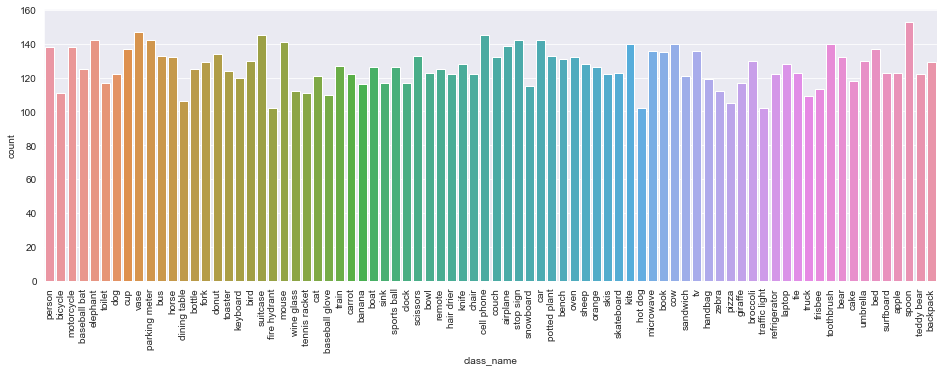

In [19]:
plt.figure(figsize=(16,5))
sns.countplot(x="class_name", data=sample_coco_df)
plt.xticks(rotation=90)
plt.show()

In [20]:
class_dist=pd.DataFrame(sample_coco_df['class_name'].value_counts()).reset_index()
class_dist.columns=['class_name','count']

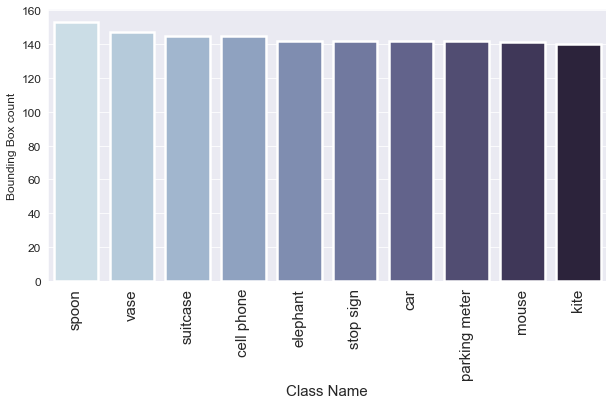

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="class_name", y="count",data=class_dist.head(10),linewidth=2.5,palette="ch:s=.25,rot=-.25")
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Class Name",fontsize=15)
plt.ylabel("Bounding Box count",fontsize=12)
plt.show()

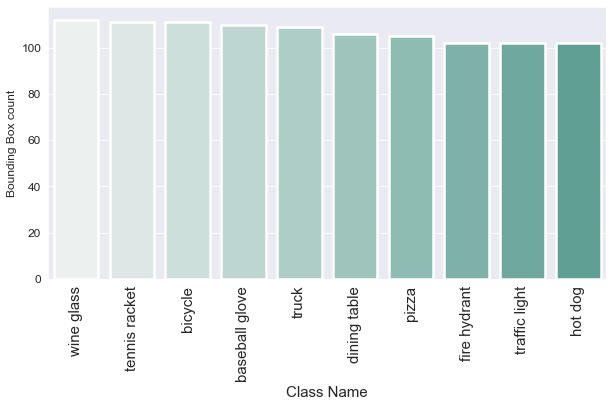

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x="class_name", y="count",data=class_dist.tail(10),linewidth=2.5,palette="light:#5A9")
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Class Name",fontsize=15)
plt.ylabel("Bounding Box count",fontsize=12)
plt.show()

In [23]:
print("Max annotations:",max(class_dist['count'])," for the class name:",class_dist.loc[class_dist['count'] == max(class_dist['count'])]['class_name'].values.item())
print("Min annotations:",min(class_dist['count'])," for the classes:",class_dist.loc[class_dist['count'] == min(class_dist['count'])]['class_name'].values)
print("Average number of annotations per class:",np.mean(class_dist['count']))    

Max annotations: 153  for the class name: spoon
Min annotations: 102  for the classes: ['fire hydrant' 'traffic light' 'hot dog']
Average number of annotations per class: 126.3125


In [24]:
class_area_dist=pd.DataFrame([sample_coco_df['class_name'],sample_coco_df['bbox_width']*sample_coco_df['bbox_height']]).T
class_area_dist.columns=['class_name','bbox_area']
class_area_dist['bbox_area']=class_area_dist['bbox_area'].apply(pd.to_numeric)
class_bbox_area=class_area_dist.groupby('class_name').mean('bbox_area').reset_index()
class_bbox_area=class_bbox_area.sort_values(by="bbox_area",ascending=False)
class_bbox_area.head()

,class_name,bbox_area
13,bottle,54505.120000
25,cow,53847.078571
52,refrigerator,53484.606557
1,apple,53271.097561
10,bird,52429.723077


In [25]:
print("Max bbox size:",max(class_bbox_area['bbox_area'])," for the class name:",class_bbox_area.loc[class_bbox_area['bbox_area'] == max(class_bbox_area['bbox_area'])]['class_name'].values.item())
print("Min annotations:",min(class_bbox_area['bbox_area'])," for the class name:",class_bbox_area.loc[class_bbox_area['bbox_area'] == min(class_bbox_area['bbox_area'])]['class_name'].values.item())

Max bbox size: 54505.12  for the class name: bottle
Min annotations: 41512.840579710144  for the class name: motorcycle


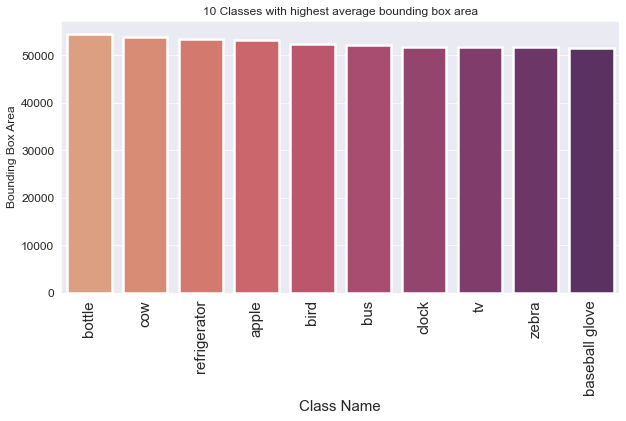

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x="class_name", y="bbox_area",data=class_bbox_area.head(10),linewidth=2.5,palette="flare")
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Class Name",fontsize=15)
plt.ylabel("Bounding Box Area",fontsize=12)
plt.title("10 Classes with highest average bounding box area")
plt.show()

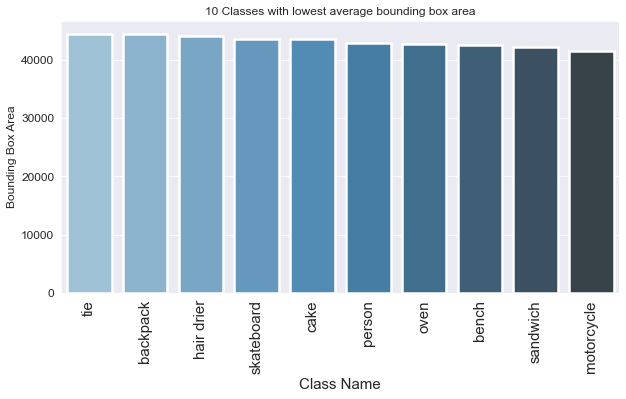

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x="class_name", y="bbox_area",data=class_bbox_area.tail(10),linewidth=2.5,palette="Blues_d")
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Class Name",fontsize=15)
plt.ylabel("Bounding Box Area",fontsize=12)
plt.title("10 Classes with lowest average bounding box area")
plt.show()

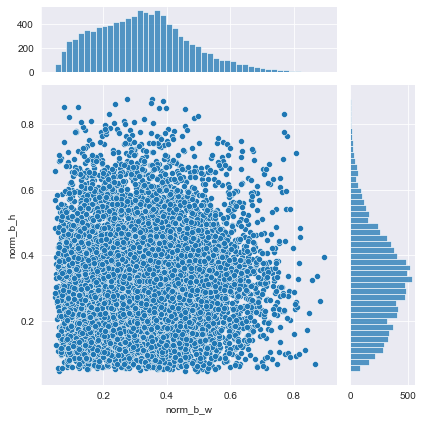

In [28]:
sns.jointplot(x="norm_b_w",y="norm_b_h",data=sample_coco_df,height=6, ratio=4, marginal_ticks=True,color= '#1f77b4')
plt.show()

In [29]:
bbox_norm_df=sample_coco_df[['norm_b_w','norm_b_h']]

## <font color=blue> KMeans Clustering </font>

In [30]:
class KMeans_Cluster:
    def __init__(self, n_clusters, cluster_df):
        self.n_clusters = n_clusters
        self.cluster_df = cluster_df
        
        self.cluster_centroids, self.wcss, self.cluster_pred = self.kmeans_clusters()
    
    def kmeans_clusters(self):
        kmeans_cluster = KMeans(n_clusters=self.n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
        cluster_pred = kmeans_cluster.fit_predict(self.cluster_df)
        return kmeans_cluster.cluster_centers_, kmeans_cluster.inertia_, cluster_pred
    
    def cluster_iou(self):
        n_d=self.cluster_df.shape[0]
        n_c=self.n_clusters
        sum=0.
        for i in range(n_d):
            b_w,b_h = self.cluster_df.iloc[i][0], self.cluster_df.iloc[i][1]
            ious=[]
            for j in range(n_c):
                c_w,c_h = self.cluster_centroids[j]
                if c_w>=b_w and c_h>=b_h:
                    iou=(b_w*b_h)/(c_w*c_h)
                elif c_w>=b_w and c_h<b_h:
                    iou=(b_w*c_h)/(((c_w-b_w)*c_h)+b_w*b_h)
                elif c_w<b_w and c_h>=b_h:
                    iou=(c_w*b_h)/(((b_w-c_w)*b_h)+c_w*c_h)
                else:
                    iou=(c_w*c_h)/(b_w*b_h)
                
                ious.append(iou)
            sum+=max(ious)
        return sum/n_d
    
    def plot_clusters(self):
        plt.scatter(self.cluster_df['norm_b_w'],self.cluster_df['norm_b_h'],c=self.cluster_pred,cmap='cividis')
        plt.scatter(self.cluster_centroids[:,0],self.cluster_centroids[:,1],s=100,c='red')
        plt.xlabel("Bounding Box Width (Normalized)",fontsize=12)
        plt.ylabel("Bounding Box Height (Normalized)",fontsize=12)
        plt.title(f'Clustered Bounding Boxes with Centers for k={self.n_clusters}',fontsize=15)
        
    def plot_anchors(self):
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(1, 1, 1)
        colors=['r','b','g','m','c','y']
        for i in range(self.n_clusters):
            a_w,a_h=self.cluster_centroids[i]
            ax.set_title(f'Anchor Boxes for k={self.n_clusters}',fontsize=15, loc='center', pad=None)
            ax.add_patch(Rectangle(((-1*a_w)/2 + 0.5,(-1*a_h)/2 + 0.5),a_w,a_h, color=colors[i],fill=False,linewidth=1))
        ax.plot()

In [31]:
iou=[]
wcss = []
kmeans_clusters={}
cluster_range = range(3, 10)
for i in cluster_range:
  kmeans_clusters[i]=KMeans_Cluster(n_clusters = i,cluster_df = bbox_norm_df)
  iou.append(kmeans_clusters[i].cluster_iou())
  wcss.append(kmeans_clusters[i].wcss)

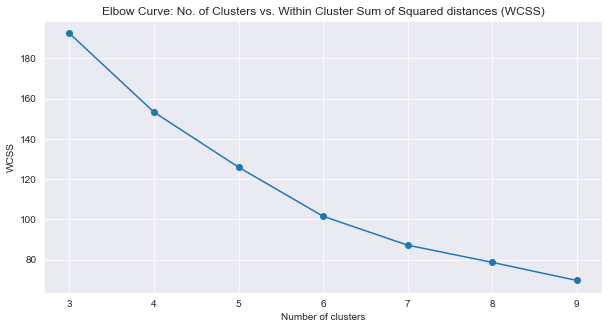

In [32]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Curve: No. of Clusters vs. Within Cluster Sum of Squared distances (WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

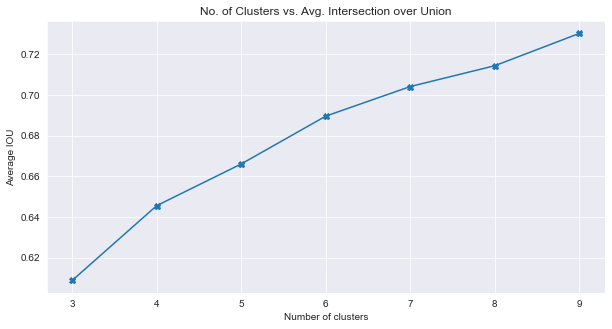

In [33]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, iou, marker='X')
plt.title('No. of Clusters vs. Avg. Intersection over Union')
plt.xlabel('Number of clusters')
plt.ylabel('Average IOU')
plt.show()

In [34]:
clusters=[3,4,5,6]
for i,j in enumerate(clusters):
    print("Number of Anchor Boxes:",j)
    print("Centroids:\n",kmeans_clusters[j].cluster_centroids,"\n")

Number of Anchor Boxes: 3
Centroids:
 [[0.29182225 0.48626313]
 [0.21944308 0.23621293]
 [0.48051709 0.27526991]] 

Number of Anchor Boxes: 4
Centroids:
 [[0.38582042 0.52863778]
 [0.24961039 0.18328872]
 [0.48374208 0.27179082]
 [0.20353974 0.38992909]] 

Number of Anchor Boxes: 5
Centroids:
 [[0.1994601  0.39825024]
 [0.38287763 0.23653974]
 [0.1883017  0.18558087]
 [0.36655995 0.53247144]
 [0.57910416 0.32142015]] 

Number of Anchor Boxes: 6
Centroids:
 [[0.33531619 0.59319985]
 [0.19011237 0.19280934]
 [0.58714721 0.34375492]
 [0.17018351 0.40277211]
 [0.40369879 0.17365452]
 [0.35597601 0.36141109]] 



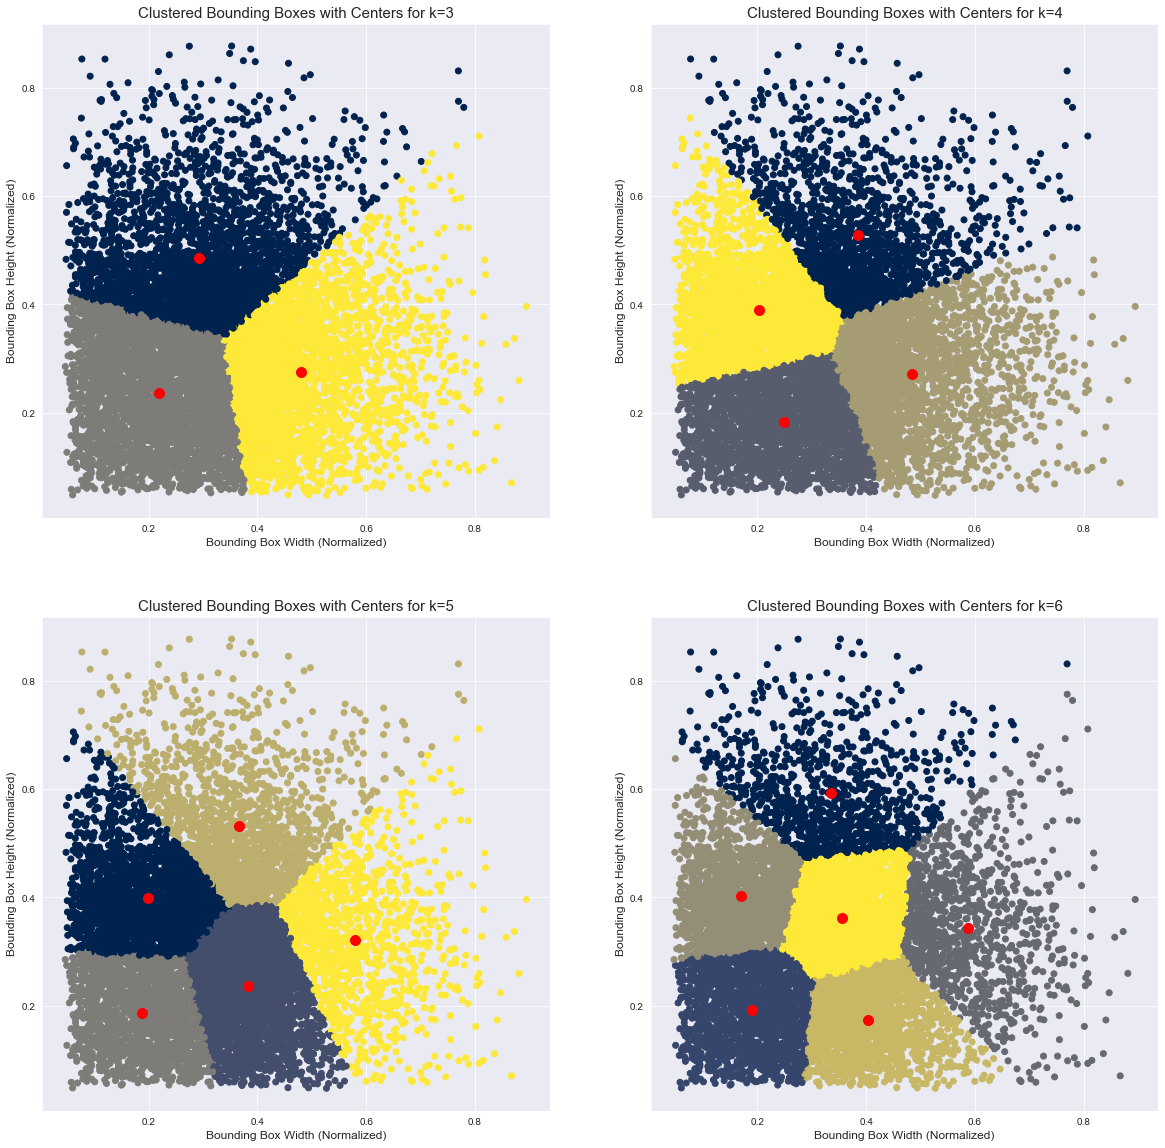

In [35]:
plt.figure(figsize=(20,20))
plt.tight_layout()
for i,j in enumerate(clusters):
    plt.subplot(2,2,i+1)
    kmeans_clusters[j].plot_clusters()
plt.show()

<Figure size 432x288 with 0 Axes>

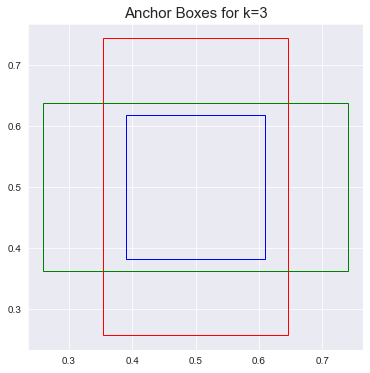

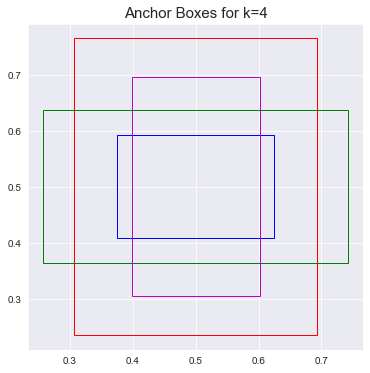

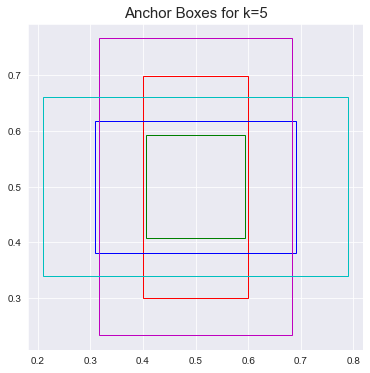

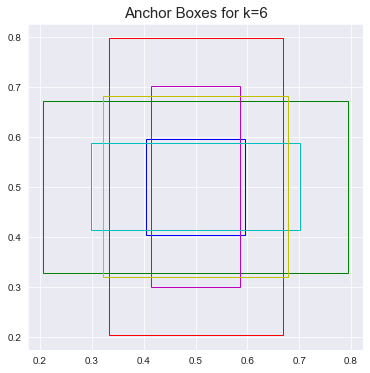

In [36]:
plt.tight_layout()
for i,j in enumerate([3,4,5,6]):
    kmeans_clusters[j].plot_anchors()
plt.show()